# Analysis examples for DANRA reanalysis in zarr storage format

*Updated: 2024-02-27, Leif Denby (lcd@dmi.dk)*

This notebook demonstrates how to analyse the DANRA reanalysis data in zarr. The full DANRA data-collection is grouped in three parts, with data on: 1) height-levels, 2) pressure-levels and 3) single-levels (e.g. Earth's surface, top-of-atmosphere, column-integral properties)

In [5]:
from pathlib import Path

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [6]:
version = "v0.3.0"
# path to copies of processed DANRA datasets on scale.dmi.dk:
fp_root = Path(f"/dmidata/projects/cloudphysics/danra/data/{version}")
# path on ohm.dmi.dk where the files where processed:
# fp_root = Path(f"/nwp/danra/data/{version}")

In [7]:
# lets have a quick look at the files of the dataset
!ls -l {fp_root}

total 4
drwxrwsr-x 12 lcd g_file_cloudphysics 4096 Feb 29 10:29 height_levels.zarr
drwxrwsr-x 16 lcd g_file_cloudphysics 4096 Feb 29 10:52 pressure_levels.zarr
-rw-rw-r--  1 lcd g_file_cloudphysics 3455 Feb 29 10:18 README.md
drwxrwsr-x 34 lcd g_file_cloudphysics 4096 Feb 29 12:24 single_levels.zarr


In [8]:
# we'll start by rendering the content of the README.md file inline here
import IPython.display as display

fp_readme = fp_root / "README.md"
with open(fp_readme, "r") as f:
    readme = f.read()
display.display(display.Markdown(readme))

# DANRA reanalysis Zarr data collection

**v0.3.0, created 2024-02-28T08:03:06**

time-span: 1990-09-01 to 2000-09-01

> All prognostic variables for 10-year period on reduced levels

## height levels

filename: `height_levels.zarr`

|                                            | 100 [m]   |
|:-------------------------------------------|:----------|
| <abbr title='Relative humidity'>r</abbr>   | ✓         |
| <abbr title='Temperature'>t</abbr>         | ✓         |
| <abbr title='u-component of wind'>u</abbr> | ✓         |
| <abbr title='v-component of wind'>v</abbr> | ✓         |

## pressure levels

filename: `pressure_levels.zarr`

|                                            | 1000 [hPa]   |
|:-------------------------------------------|:-------------|
| <abbr title='Cloud ice'>ciwc</abbr>        | ✓            |
| <abbr title='Cloud water'>cwat</abbr>      | ✓            |
| <abbr title='Relative humidity'>r</abbr>   | ✓            |
| <abbr title='Temperature'>t</abbr>         | ✓            |
| <abbr title='Vertical velocity'>tw</abbr>  | ✓            |
| <abbr title='u-component of wind'>u</abbr> | ✓            |
| <abbr title='v-component of wind'>v</abbr> | ✓            |
| <abbr title='Geopotential'>z</abbr>        | ✓            |

## single levels

filename: `single_levels.zarr`

<abbr title='CAPE out of the model'>cape_column</abbr>, <abbr title='Cloud base'>cb_column</abbr>, <abbr title='Cloud top'>ct_column</abbr>, <abbr title='Graupel'>grpl_column</abbr>, <abbr title='High cloud cover'>hcc0m</abbr>, <abbr title='Icing index'>icei0m</abbr>, <abbr title='Low cloud cover'>lcc0m</abbr>, <abbr title='Long-wave radiation flux'>lwavr0m</abbr>, <abbr title='Medium cloud cover'>mcc0m</abbr>, <abbr title='Mixed layer depth'>mld0m</abbr>, <abbr title='Pressure'>pres0m</abbr>, <abbr title='Pressure'>pres_seasurface</abbr>, <abbr title='Precipitation Type'>prtp0m</abbr>, <abbr title='Pseudo satellite image: cloud top temperature (infrared)'>psct0m</abbr>, <abbr title='Pseudo satellite image: cloud water reflectivity (visible)'>pscw0m</abbr>, <abbr title='Pseudo satellite image: water vapour Tb'>pstb0m</abbr>, <abbr title='Pseudo satellite image: water vapour Tb + correction for clouds'>pstbc0m</abbr>, <abbr title='Precipitable water'>pwat_column</abbr>, <abbr title='Water equivalent of accumulated snow depth'>sf0m</abbr>, <abbr title='Short-wave radiation flux'>swavr0m</abbr>, <abbr title='Temperature'>t0m</abbr>, <abbr title='Visibility'>vis0m</abbr>, <abbr title='AROME hail diagnostic'>xhail0m</abbr>, <abbr title='Relative humidity'>r2m</abbr>, <abbr title='Temperature'>t2m</abbr>, <abbr title='u-component of wind'>u10m</abbr>, <abbr title='v-component of wind'>v10m</abbr>

<pre>
INSTALLED VERSIONS
------------------
commit: b24d53b9e23283b0ca732e6504ed1e001a292241
python: 3.10.13 | packaged by conda-forge | (main, Oct 26 2023, 18:07:37) [GCC 12.3.0]
python-bits: 64
OS: Linux
OS-release: 5.15.0-94-generic
machine: x86_64
hostname: ohm.dmi.dk
processor: x86_64
byteorder: little
LC_ALL: None
LANG: C.UTF-8
LOCALE: ('en_US', 'UTF-8')
libhdf5: 1.12.2
libnetcdf: 4.9.3-development

kerchunker: None
luigi: 3.4.0
dmidc: 0.4.1
xarray: 2023.12.0
pandas: 2.1.4
numpy: 1.26.2
scipy: 1.11.4
bottleneck: None
dask: 2024.1.1
distributed: 2024.1.1
fsspec: 2023.12.2
numba: 0.58.1
setuptools: 69.0.2
pip: 23.3.2
conda: None
pytest: None
mypy: None
IPython: 8.18.1
sphinx: None
</pre>



# Looking at pressure-level data

In [9]:
ds_pl = xr.open_zarr(fp_root / "pressure_levels.zarr")
ds_pl

<xarray.Dataset>
Dimensions:   (pressure: 1, time: 29120, y: 589, x: 789)
Coordinates:
    lat       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    lon       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
  * pressure  (pressure) int64 1000
  * time      (time) datetime64[ns] 1990-09-01 ... 2000-08-18T21:00:00
  * x         (x) float64 -1.999e+06 -1.997e+06 ... -3.175e+04 -2.925e+04
  * y         (y) float64 -6.095e+05 -6.07e+05 -6.045e+05 ... 8.58e+05 8.605e+05
Data variables:
    ciwc      (pressure, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    cwat      (pressure, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    r         (pressure, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    t         (pressure, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    tw        (pressure, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    u         (pressure, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    v         (pressure, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    z         (pressure, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
Attributes:
    description:  All prognostic variables for 10-year period on reduced levels

In [10]:
# selecting a variable and a time-subset
da_t = ds_pl.t.sel(time=slice("1990-09-15T06:00:00", "1990-09-15T16:00:00"))

da_t

<xarray.DataArray 't' (pressure: 1, time: 4, y: 589, x: 789)>
dask.array<getitem, shape=(1, 4, 589, 789), dtype=float64, chunksize=(1, 4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
    lat       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    lon       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
  * pressure  (pressure) int64 1000
  * time      (time) datetime64[ns] 1990-09-15T06:00:00 ... 1990-09-15T15:00:00
  * x         (x) float64 -1.999e+06 -1.997e+06 ... -3.175e+04 -2.925e+04
  * y         (y) float64 -6.095e+05 -6.07e+05 -6.045e+05 ... 8.58e+05 8.605e+05
Attributes:
    level_type:   isobaricInhPa
    long_name:    Temperature
    shortName:    t
    stepType:     instant
    stepUnits:    1
    typeOfLevel:  isobaricInhPa
    units:        K

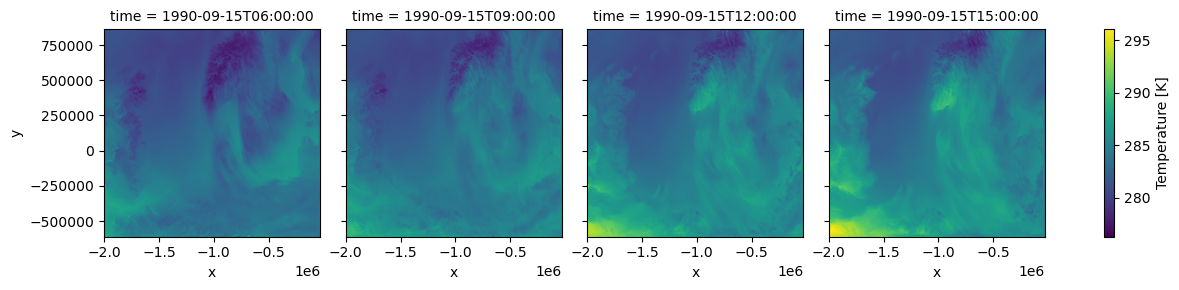

In [11]:
da_t.plot(col="time", col_wrap=4)

/tmp/ipykernel_2850840/3936377969.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in g.axes.flatten():


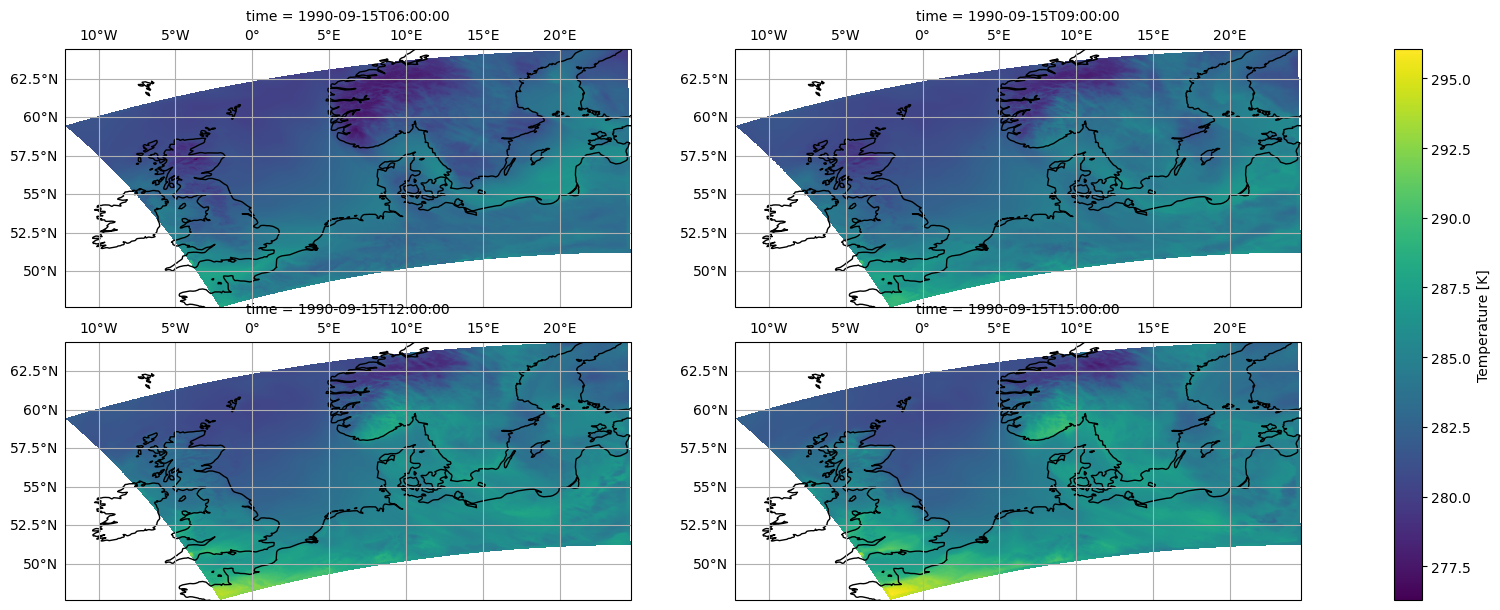

In [12]:
# the same but plotted on a map
g = da_t.plot(col_wrap=2, col="time", x="lon", y="lat", transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.PlateCarree()), aspect=3.0)
for ax in g.axes.flatten():
    ax.gridlines(draw_labels=["top", "left"])
    ax.coastlines()

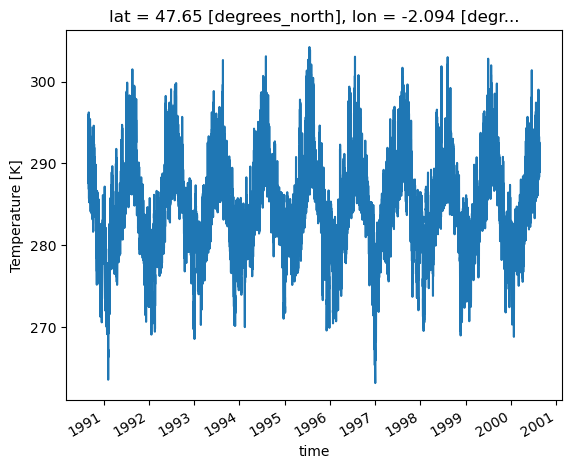

In [13]:
ds_pl.isel(x=0, y=0).t.plot()

# Looking at height-level data

In [14]:
import xarray as xr
ds_hl = xr.open_zarr(fp_root / "height_levels.zarr")
ds_hl

<xarray.Dataset>
Dimensions:   (altitude: 1, y: 589, x: 789, time: 29120)
Coordinates:
  * altitude  (altitude) int64 100
    lat       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    lon       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
  * time      (time) datetime64[ns] 1990-09-01 ... 2000-08-18T21:00:00
  * x         (x) float64 -1.999e+06 -1.997e+06 ... -3.175e+04 -2.925e+04
  * y         (y) float64 -6.095e+05 -6.07e+05 -6.045e+05 ... 8.58e+05 8.605e+05
Data variables:
    r         (altitude, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    t         (altitude, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    u         (altitude, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    v         (altitude, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
Attributes:
    description:  All prognostic variables for 10-year period on reduced levels

In [15]:
da_temp_100m = ds_hl.t

In [16]:
da_temp_100m.sel(time=slice("1991-01-01T03:00", "1991-01-01T18:00"))

<xarray.DataArray 't' (altitude: 1, time: 6, y: 589, x: 789)>
dask.array<getitem, shape=(1, 6, 589, 789), dtype=float64, chunksize=(1, 6, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * altitude  (altitude) int64 100
    lat       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    lon       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
  * time      (time) datetime64[ns] 1991-01-01T03:00:00 ... 1991-01-01T18:00:00
  * x         (x) float64 -1.999e+06 -1.997e+06 ... -3.175e+04 -2.925e+04
  * y         (y) float64 -6.095e+05 -6.07e+05 -6.045e+05 ... 8.58e+05 8.605e+05
Attributes:
    level_type:   heightAboveGround
    long_name:    Temperature
    shortName:    t
    stepType:     instant
    stepUnits:    1
    typeOfLevel:  heightAboveGround
    units:        K

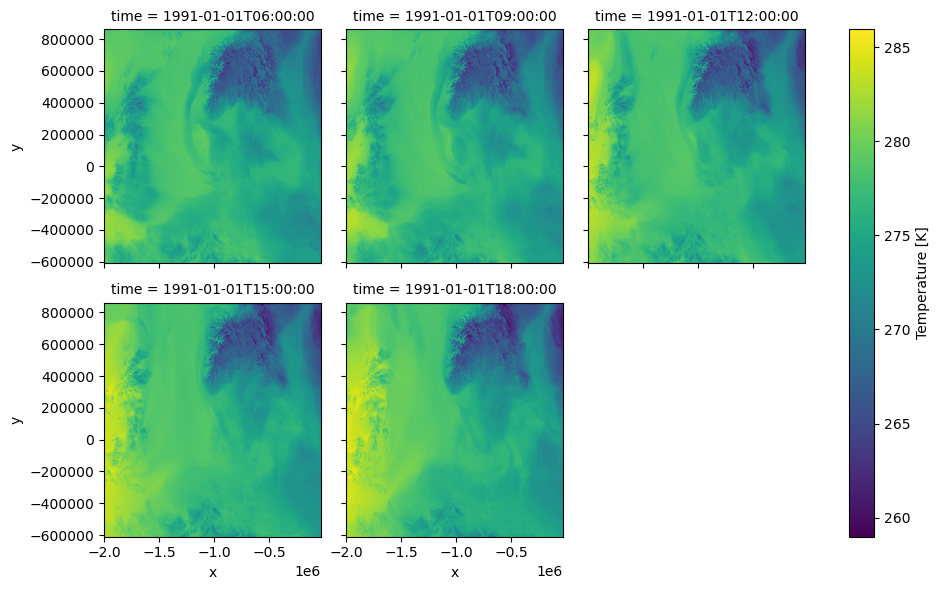

In [17]:
da_temp_100m.sel(time=slice("1991-01-01T06:00", "1991-01-01T18:00")).plot(col="time", col_wrap=3)

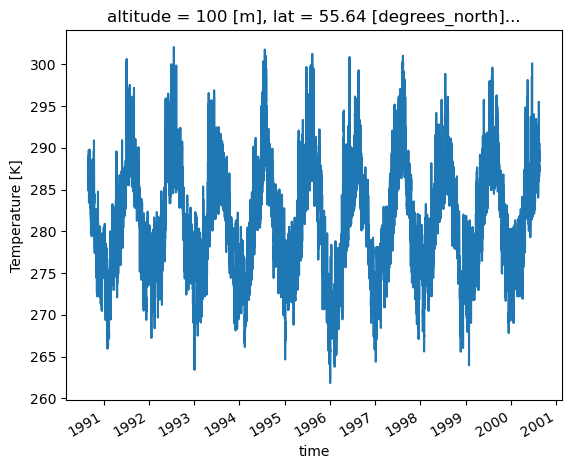

In [18]:
da_temp_100m.sel(x=-1.0e6, y=0.0, method="nearest").plot()

# Looking at single-level data

In [19]:
ds_sl = xr.open_zarr(fp_root / "single_levels.zarr")
ds_sl

<xarray.Dataset>
Dimensions:          (time: 29120, y: 589, x: 789)
Coordinates:
    lat              (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    lon              (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
  * time             (time) datetime64[ns] 1990-09-01 ... 2000-08-18T21:00:00
  * x                (x) float64 -1.999e+06 -1.997e+06 ... -3.175e+04 -2.925e+04
  * y                (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables: (12/27)
    cape_column      (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    cb_column        (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    ct_column        (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    grpl_column      (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    hcc0m            (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    icei0m           (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    ...               ...
    t0m              (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    t2m              (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    u10m             (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    v10m             (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    vis0m            (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
    xhail0m          (time, y, x) float64 dask.array<chunksize=(256, 256, 256), meta=np.ndarray>
Attributes:
    description:  All prognostic variables for 10-year period on reduced levels

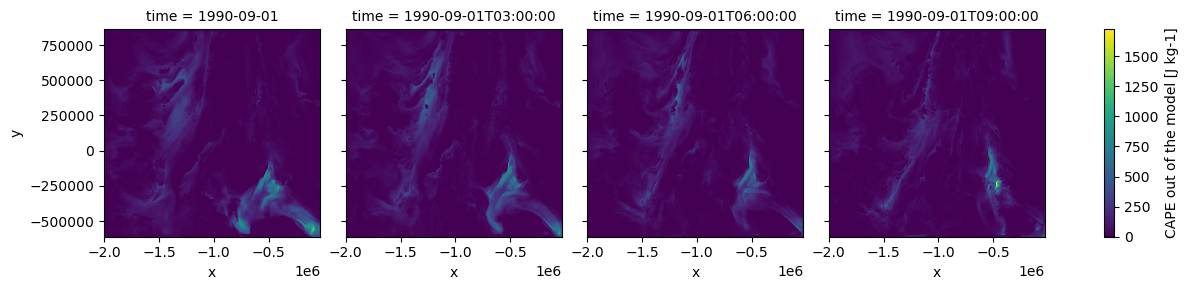

In [20]:
ds_sl.cape_column.isel(time=slice(0, 4)).plot(col="time")